In [1]:
from TightBinding import *

# class MagneticTB

## __init__

Arguments

1. TBmodel
2. $\Phi$ or '$A$ and $T$'
3. potential_type ("linear", "landau", or "nonlinear", default: "nonlinear")
4. symbolic (default: True)

Process
1. If $\Phi$ is given, rather than '$A$ and $T$', compute $A$ and $T$ based on the constraint selection on the type of vector potential(potential_type)
2. Check whether $A$ and $T$ satisfy the commensurability condition, which is $D^T AT\in\mathbb{Z}_{2\times2}$ for "linear" (including "landau") and $T^T A T \in \mathbb{Z}_{2\times2}$ for "nonlinear". For specification, please refer to the paper()
3. Generate attributes

In [2]:
Square = TB([[1,0],[0,1]], {'A':[0,0]}, {('A','A',(1,0),1),('A','A',(0,1),1)})
MagneticTBmodel = MagneticTB(Square, Phi='1/3', potential_type = "landau", symbolic = True)

## Attributes

Attributes are similar to that of the class TB.

TBlattice is the lattice of the TBmodel (with Unit Cells), while lattice is the lattice of the MagneticTBmodel (with Magnetic Unit Cells).

In [3]:
MagneticTBmodel.TBlattice

Matrix([
[1, 0],
[0, 1]])

In [4]:
MagneticTBmodel.lattice

Matrix([
[3, 0],
[0, 1]])

Atoms are marked as (nlayer, (atom name, (2 indices showing the UC-index in MUC)))

In [5]:
MagneticTBmodel.atoms

{(0, ('A', (0, 0))): [0, 0],
 (0, ('A', (1, 0))): [1, 0],
 (0, ('A', (2, 0))): [2, 0]}

In [6]:
MagneticTBmodel.hops

{((0, ('A', (0, 0))), (0, ('A', (0, 0))), (0, 1), 1, 0),
 ((0, ('A', (0, 0))), (0, ('A', (1, 0))), (0, 0), 1, 0),
 ((0, ('A', (1, 0))), (0, ('A', (1, 0))), (0, 1), 1, 1/3),
 ((0, ('A', (1, 0))), (0, ('A', (2, 0))), (0, 0), 1, 0),
 ((0, ('A', (2, 0))), (0, ('A', (0, 0))), (1, 0), 1, 0),
 ((0, ('A', (2, 0))), (0, ('A', (2, 0))), (0, 1), 1, 2/3)}

In [7]:
MagneticTBmodel.Phi

1/3

In [8]:
MagneticTBmodel.D

Matrix([
[1, 0],
[0, 1]])

In [9]:
MagneticTBmodel.A

Matrix([
[  0, 0],
[1/3, 0]])

In [10]:
MagneticTBmodel.T

Matrix([
[3, 0],
[0, 1]])

In [11]:
MagneticTBmodel.layers

[{('A', (0, 0)), ('A', (1, 0)), ('A', (2, 0))}]

In [12]:
MagneticTBmodel.symbolic

True

## Functions (Methods)

Functions have the same meaning as that of the class TB

### Hamiltonian(k)

In [13]:
MagneticTBmodel.Hamiltonian(['1/3','1/2'])

[[[(2+0j), (-1+0j), (0.4999999999999998-0.8660254037844387j)],
  [(-1+0j), (-0.9999999999999998+0j), (-1+0j)],
  [(0.4999999999999998+0.8660254037844387j),
   (-1+0j),
   (-1.0000000000000007+0j)]],
 {(0, ('A', (0, 0))): 0, (0, ('A', (1, 0))): 1, (0, ('A', (2, 0))): 2}]

### symoff()

### duplicated()

In [14]:
model = MagneticTBmodel.duplicated()

In [15]:
model.symoff()

In [16]:
MagneticTBmodel.symbolic

True

### plot(save_dir)

This function plots a hopping network with argument of the complex hopping energy marked as colors and arrows. If the arrow is unidirectional with phase $\phi \in (0,\pi)$ depicted as the color of the arrow, the hopping in the reverse direction has the phase $2\pi - \phi$. Following figures are the Figure of the paper(). Here, we can know that "landau" and "linear" constraint prevents the Magnetic Unit Cell to be reduced to the exact lower bound given by the flux quantization. (Here, the exact lower bound is two times the size of the Unit Cell since $\Phi=1/2$)

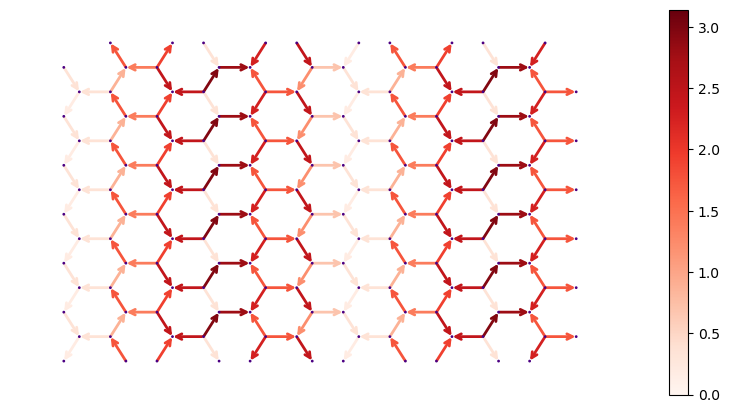

In [17]:
MagneticTB(Honeycomb, A=[[0,0],['1/2',0]], T=[[6,0],[0,1]],potential_type="landau").plot()

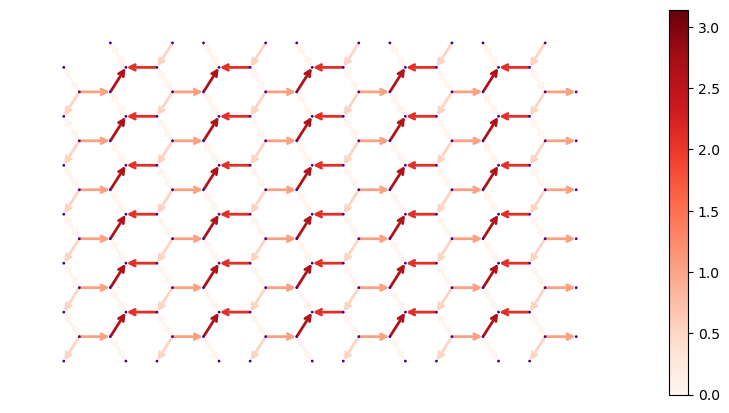

In [18]:
MagneticTB(Honeycomb, A=[[1,0],['1/2',0]], T=[[2,0],[0,1]],potential_type="linear").plot()

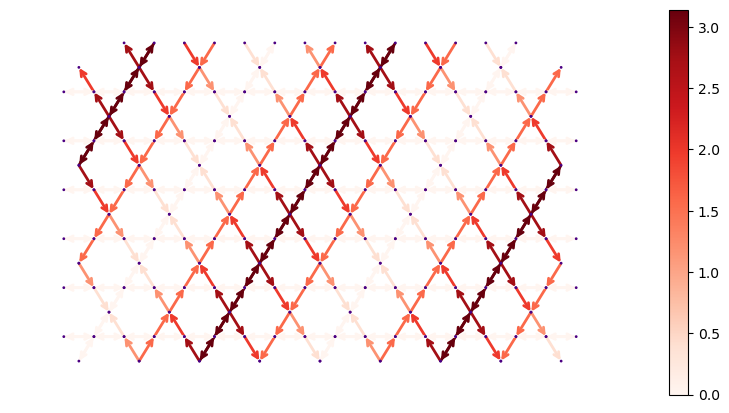

In [19]:
MagneticTB(Kagome, A=[[0,0],['1/2',0]], T=[[4,0],[0,1]],potential_type="linear").plot()

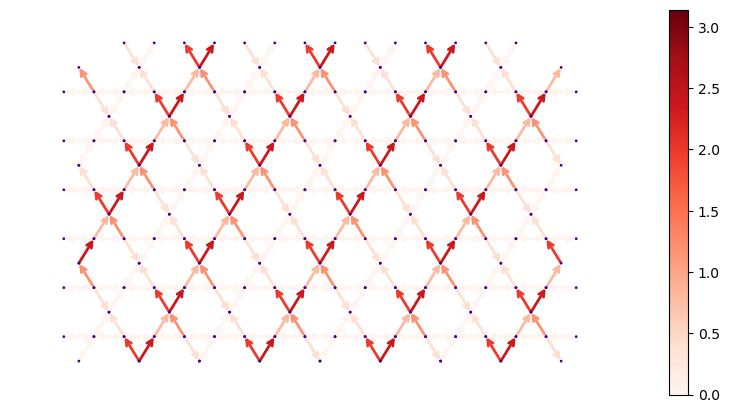

In [20]:
MagneticTB(Kagome, A=[[0,0],['1/2',0]], T=[[2,0],[0,1]],potential_type="nonlinear").plot()